Importeer de benodigde libraries

In [1]:
import os.path
import json
import math
import numpy as np
from matplotlib import pyplot as plt

Open en lezen van gemeente-veiligheidsregio's

In [2]:
with open('data/gemeente_veiligheidsregio.json', 'r') as f:
    regio_data = json.load(f)

Voer een gemeente in en dan word de VR (veiligheidsregios) van die gemeente opgezocht

In [3]:
regios = ''
while not regios: # Nu kun je niet een niet bestaande stad invullen
  stad = input("Geef uw stad op: ")
  stad = stad.capitalize() # Eerste letter = caps
  print('')  # Beetje whitespace tussen de teksten door
  regios = [x for x in regio_data if x['name'] == stad]

Geef uw stad op: groningen



In [4]:
regio = regios[0]['safetyRegion']
print("De veiligheidsregio nummer van " + stad + " is: " + regio)
print('')
# VR van Groningen = VR01

De veiligheidsregio nummer van Groningen is: VR01



Lijst met gemeentes in dezelfde veiligheid regio:

In [5]:
steden = [x for x in regio_data if x['safetyRegion'] == regio]
print("Gemeentes in deze regio: ")
for number, ss in enumerate(steden):
    print(number+1, '\t' + ss['name'])  # Wil niet bij '0' beginnen vandaar +1
print('')  # Beetje whitespace tussen de teksten door



Gemeentes in deze regio: 
1 	Appingedam
2 	Delfzijl
3 	Groningen
4 	Het Hogeland
5 	Loppersum
6 	Midden-Groningen
7 	Oldambt
8 	Pekela
9 	Stadskanaal
10 	Veendam
11 	Westerkwartier
12 	Westerwolde



Voer een datum in de format van yyyy-mm-dd en tussen 2020-09-01 en 2020-10-07

In [6]:
file_name = ''
while not os.path.isfile(file_name): # Nu kun je geen verkeerde datum invullen
    datum = input('Geef een datum in de format van yyyy-mm-dd op:')
    file_name = 'data/{}_1/{}.json'.format(datum, regio)
print('')

Geef een datum in de format van yyyy-mm-dd op:2020-09-23
Geef een datum in de format van yyyy-mm-dd op:2020-10-07



Code dingetjes niks bijzonder

In [7]:
with open(file_name, 'r') as f:
    data = json.load(f)
    
# De objecten van de resultaten per regio
region_results = data['results_per_region']['values']
decimalen = 2

# data length
DATA_length = len(region_results)

# Initiate data arrays
DATA_rna = 0
DATA_total_reported_increase_per_region = []
DATA_infected_total_counts_per_region = []
DATA_hospital_total_counts_per_region = []
DATA_infected_increase_per_region = []
DATA_hospital_increase_per_region = []
DATA_hospital_moving_avg_per_region = []

for d in region_results:
    DATA_total_reported_increase_per_region.append(d['total_reported_increase_per_region'])
    DATA_infected_total_counts_per_region.append(d['infected_total_counts_per_region'])
    DATA_hospital_total_counts_per_region.append(d['hospital_total_counts_per_region'])
    DATA_infected_increase_per_region.append(d['infected_increase_per_region'])
    DATA_hospital_increase_per_region.append(d['hospital_increase_per_region'])
    DATA_hospital_moving_avg_per_region.append(d['hospital_moving_avg_per_region'])
    
# Initiate totales
TOTAL_rna = 0
TOTAL_total_reported_increase_per_region = 0
TOTAL_infected_total_counts_per_region = 0
TOTAL_hospital_total_counts_per_region = 0
TOTAL_infected_increase_per_region = 0
TOTAL_hospital_increase_per_region = 0
TOTAL_hospital_moving_avg_per_region = 0



Hier wordt het totaal berekend en weergeven

In [8]:
# Get data from given region
print('--------------------------------------------------')
print("Gemeente: " + stad + "\t" + "Datum: ", datum)
print('')

# totalen berekenen
for i in range(DATA_length):
    TOTAL_total_reported_increase_per_region += DATA_total_reported_increase_per_region[i]
    TOTAL_infected_total_counts_per_region += DATA_infected_total_counts_per_region[i]
    TOTAL_hospital_total_counts_per_region += DATA_hospital_total_counts_per_region[i]
    TOTAL_infected_increase_per_region += DATA_infected_increase_per_region[i]
    TOTAL_hospital_increase_per_region += DATA_hospital_increase_per_region[i]
    TOTAL_hospital_moving_avg_per_region += DATA_hospital_moving_avg_per_region[i]

# calculate average
AVERAGE_total_reported_increase_per_region = round(DATA_length / TOTAL_total_reported_increase_per_region, decimalen) if TOTAL_total_reported_increase_per_region > 0 else 0
AVERAGE_infected_total_counts_per_region = round(DATA_length / TOTAL_infected_total_counts_per_region, decimalen) if TOTAL_infected_total_counts_per_region > 0 else 0
AVERAGE_hospital_total_counts_per_region = round(DATA_length / TOTAL_hospital_total_counts_per_region, decimalen) if TOTAL_hospital_total_counts_per_region > 0 else 0
AVERAGE_infected_increase_per_region = round(DATA_length / TOTAL_infected_increase_per_region, decimalen) if TOTAL_infected_increase_per_region > 0 else 0
AVERAGE_hospital_increase_per_region = round(DATA_length / TOTAL_hospital_increase_per_region, decimalen) if TOTAL_hospital_increase_per_region > 0 else 0
AVERAGE_hospital_moving_avg_per_region = round(DATA_length / TOTAL_hospital_moving_avg_per_region, decimalen) if TOTAL_hospital_moving_avg_per_region > 0 else 0

# total_reported_increase_per_region
print("Total reported: ", TOTAL_total_reported_increase_per_region)
print("Average: ", AVERAGE_total_reported_increase_per_region)
print('')

# infected_total_counts_per_region
print("Total infected: ", math.floor(TOTAL_infected_total_counts_per_region))
print("Average: ", AVERAGE_infected_total_counts_per_region)
print('')

# hospital_total_counts_per_region
print("Total in hospital: ", math.floor(TOTAL_hospital_total_counts_per_region))
print("Average: ", AVERAGE_hospital_total_counts_per_region)
print('')

# infected_increase_per_region
print("Total infected increase: ", math.floor(TOTAL_infected_increase_per_region))
print("Average: ", AVERAGE_infected_increase_per_region)
print('')

# hospital_increase_per_region
print("Total hospital increase: ", math.floor(TOTAL_hospital_increase_per_region))
print("Average: ", AVERAGE_hospital_increase_per_region)
print('')

# hospital_moving_avg_per_region
print("Total hospital moving average: ", math.floor(TOTAL_hospital_moving_avg_per_region))
print("Average: ", AVERAGE_hospital_moving_avg_per_region)
print('')

# Bereken totale rna per ml van gegeven data en regio
for d in data['results_per_sewer_installation_per_region']['values'][0]['values']:
    TOTAL_rna = TOTAL_rna + d['rna_per_ml']

print("Total ribonucleïnezuur (rna) per ml", TOTAL_rna)
print('--------------------------------------------------')
print('')
print('')

--------------------------------------------------
Gemeente: Groningen	Datum:  2020-10-07

Total reported:  2499
Average:  0.08

Total infected:  17204
Average:  0.01

Total in hospital:  14083
Average:  0.01

Total infected increase:  426
Average:  0.48

Total hospital increase:  77
Average:  2.66

Total hospital moving average:  76
Average:  2.69

Total ribonucleïnezuur (rna) per ml 1650
--------------------------------------------------




Grafieken

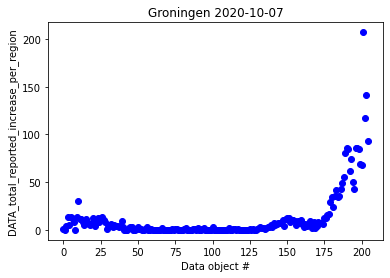

In [9]:
# eem wat proberen

x = np.arange(0,DATA_length) 
# y = 2 * x + 5 
y = [i for i in DATA_total_reported_increase_per_region]
plt.title(stad + " " + datum) 
plt.xlabel("Data object #") 
plt.ylabel("DATA_total_reported_increase_per_region") 
plt.plot(x,y,"ob") 

plt.show()